In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [2]:
train = np.genfromtxt('./Q3data/train.csv', delimiter = ',')
val = np.genfromtxt('./Q3data/val.csv', delimiter = ',')
test = np.genfromtxt('./Q3data/test.csv', delimiter = ',')

In [3]:
val = val[~np.isnan(val)]
test = test[~np.isnan(test)]

In [4]:
val = val[:, np.newaxis]

In [5]:
5/40

0.125

In [6]:
new_train = train[~np.isnan(train)]
new_train = new_train[:, np.newaxis]

In [7]:
width = [0.5,1,4,10]
colors = ['red', 'green', 'black', 'yellow']

In [8]:
xaxis = np.linspace(0, 80, 30)[:, np.newaxis]

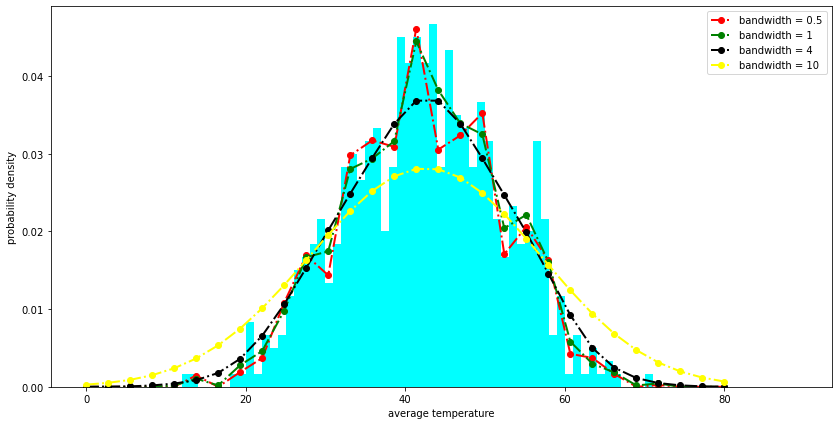

In [9]:
plt.figure(figsize=(14, 7))
for w, color in zip(width, colors):
    kde = KernelDensity(bandwidth = w).fit(new_train)
    plt.plot(xaxis, np.exp(kde.score_samples(xaxis)), color = color, ls = '-.', lw = 2,
             label = "bandwidth = {}".format(w), marker = "o")
plt.hist(new_train,bins = np.arange(10, 90, 1) ,weights = np.ones(len(new_train)) / len(new_train), color = 'aqua')
plt.xlabel('average temperature')
plt.ylabel('probability density')
plt.legend()
plt.show()

In [10]:
bandwidths = np.arange(0.5, 10.5, 0.5)

In [11]:
loss = np.zeros(20)

In [12]:
def inter_prob(left, right, kde, val):
    from_interval = [k for k in val[:,0] if k >= left and k < right]
    if len(from_interval) == 0:
        return 0
    from_interval.sort()
    subinterval_width = np.zeros(len(from_interval))
    for i in range(len(from_interval)-1):
        subinterval_width[i] = from_interval[i+1] - from_interval[i]
    subinterval_width[-1] = right - from_interval[-1]
    
    val_in_interval = np.array(from_interval)
    val_in_interval = val_in_interval[:, np.newaxis]
    return np.sum(np.exp(kde.score_samples(val_in_interval))[:] * subinterval_width[:])

In [13]:
def integral(left, right, width, kde):
    x = np.arange(left, right, width)
    x = x[:, np.newaxis]
    y = np.exp(kde.score_samples(x))
    return np.sum(y * width)

In [14]:
interval = np.arange(5, 81, 5)
len(interval)

16

In [15]:
for i in range(20):
    kde_prob = np.zeros(15)
    val_prob = np.zeros(15)
    bw = bandwidths[i]
    kde = KernelDensity(bandwidth = bw).fit(new_train)
    for j in range(15):
        kde_prob[j] = integral(interval[j], interval[j+1], 0.125, kde)
        val_prob[j] = inter_prob(interval[j], interval[j+1], kde, val)
    loss[i] = np.sum((kde_prob - val_prob)**2)

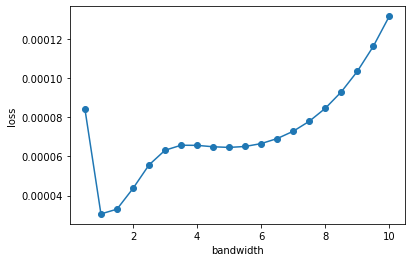

In [16]:
plt.plot(bandwidths, loss, marker='o')
plt.xlabel('bandwidth')
plt.ylabel('loss')
plt.show()

In [17]:
bandwidths[np.argmin(loss)]

1.0

In [18]:
test = test[:, np.newaxis]
space = np.arange(5, 80, 2)

In [19]:
kde_test = KernelDensity(bandwidth = 1).fit(new_train)

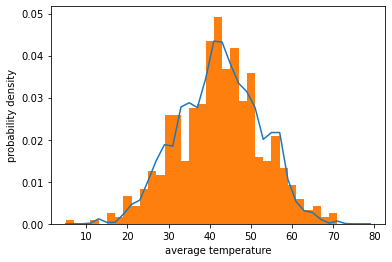

In [20]:
plt.plot(space, np.exp(kde_test.score_samples(space[:,np.newaxis])))
plt.hist(test[:,0], bins = space, density = True)
plt.xlabel('average temperature')
plt.ylabel('probability density')
plt.show()